# Image Features

The goal of this notebook is to implement two commmon feature engineering processes in image classification:

1. Color histogram
2. Histogram of oriented gradients

# 1. Color histogram

The idea behind this method is to count the number of pixes in an image, corresponding to certain color.

In [23]:
### imports
from __future__ import print_function
import numpy as np
from PIL import Image
from scipy.ndimage import imread
import matplotlib.pyplot as plt
%matplotlib inline


A little bit of awesomeness...


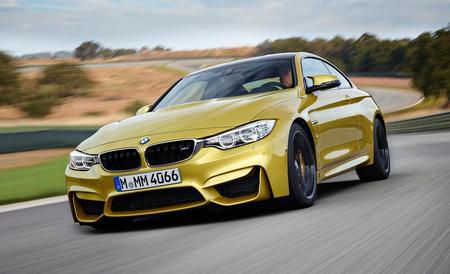

In [7]:
### load and display image
bmw_image = Image.open('../data/bmw-m4.jpg')
print('A little bit of awesomeness...')
bmw_image

In [20]:
### import image as numpy array having RGB as 3th dimension
img = imread('../data/bmw-m4.jpg', mode='RGB')

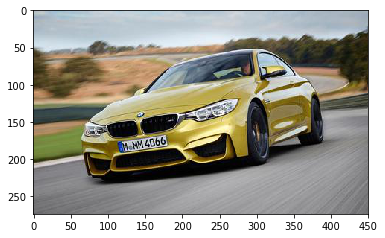

Image loaded successfully.
Histogram updated successfully.


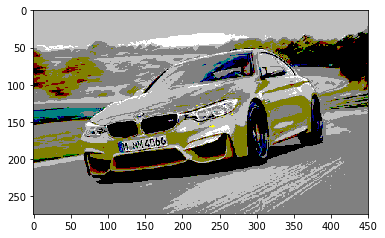

In [128]:
### define class, which reads the image and returns the number of pixels, 
#   corresponding to the different classes as features
import numpy as np
from scipy.ndimage import imread

class ColorHistogram():
    def __init__(self):
        # initialize dimensions
        self._height = 0
        self._width = 0
        # initialize container for the image
        self._img = None
        # define colors
        self._colors  = {'black' : np.array([0,0,0]), 
                         'white' : np.array([255,255,255]),
                         'red' : np.array([255,0,0]),
                         'lime' : np.array([0,255,0]),
                         'blue' : np.array([0,0,255]),
                         'yellow' : np.array([255,255,0]),
                         'cyan' : np.array([0,255,255]),
                         'magenta' : np.array([255,0,255]),
                         'silver' : np.array([192,192,192]),
                         'gray' : np.array([128,128,128]),
                         'maroon' : np.array([128,0,0]),
                         'olive' : np.array([128,128,0]),
                         'green' : np.array([0,128,0]),
                         'purple' : np.array([128,0,128]),
                         'teal' : np.array([0,128,128]),
                         'navy' : np.array([0,0,128])
                        }
        self._histogram_colors = {}
        self._reset_statistics()
            
    def _reset_statistics(self):
        """
        Resets statistics, before a new image is loaded.
        """
        for color in self._colors.keys():
            self._histogram_colors[color] = 0
        self._img = None
        self._height = 0
        self._width = 0
        
    def _get_closest_color(self, pixel, norm=2):
        """
        Updates the color histogram, for a given pixel, and returns the closest color as array.
        'norm' is the norm, used to compute the distance.
        """
        # get the closest color to that pixel
        distances = [np.linalg.norm(pixel - self._colors[key], ord=norm) for key in self._colors.keys()]
        closest_color = self._colors.keys()[np.argmin(distances)]
        # update color histogram and return the closest color as array
        self._histogram_colors[closest_color] += 1
        return self._colors[closest_color]
        
    def load_image(self, path):
        try:
            self._reset_statistics()
            self._img = imread(path, mode='RGB')
            self._height = self._img.shape[0]
            self._width = self._img.shape[1]
            print('Image loaded successfully.')
        except Exception as e:
            print(e)
            
    def update_histogram(self):
        img_reshaped = self._img.reshape((self._height*self._width,3)) 
        img_base = np.zeros_like(img_reshaped)
        for i in range(img_reshaped.shape[0]):
            base_colors = ch._get_closest_color(img_reshaped[i,:])
            img_base[i,:] = base_colors
        self._img_base = img_base.reshape((self._height, self._width, 3))
        print('Histogram updated successfully.')
    
    def get_histogram(self):
        return self._histogram_colors
        
    def show_base_image(self):
        plt.imshow(self._img_base)
        plt.show()
            
            
        
    
ch = ColorHistogram()
ch.load_image('../data/bmw-m4.jpg')
ch.update_histogram()
color_hist = ch.get_histogram()
ch.show_base_image()

# 2. Histogram of oriented gradients